__8.1 (Comparing average gas mileage).__ <br> A table of gas mileages on four
new models of Japanese luxury cars is given in Larsen & Marx [30, Question 12.1.1], which is shown in Table 1.4, page 27. See Example 1.11 for a
method of entering this data. Test if the four models (A, B, C, D) give the
same gas mileage, on average, at α = 0.05 significance.

In [3]:
y1 = c(22, 26)
y2 = c(28, 24, 29)
y3 = c(29, 32, 28)
y4 = c(23, 24)
y = c(y1, y2, y3, y4)
Model = c(rep("A", 2), rep("B", 3), rep("C", 3), rep("D", 2))
mileages = data.frame(y, Model)
mileages

y,Model
22,A
26,A
28,B
24,B
29,B
29,C
32,C
28,C
23,D
24,D


[1] TRUE

[1] "A" "B" "C" "D"

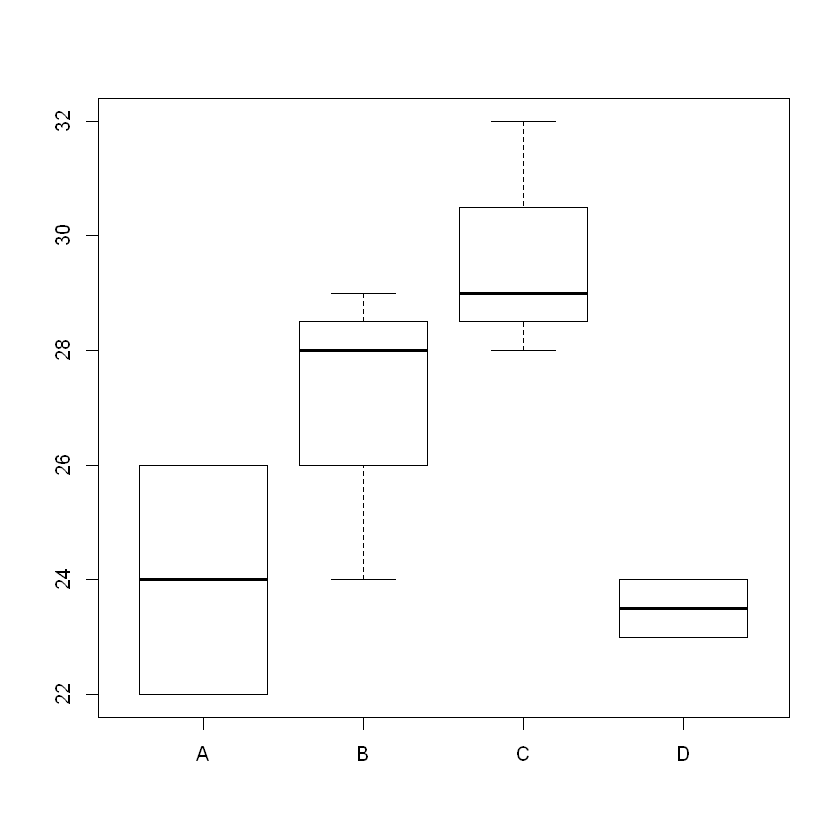

In [11]:
is.factor(mileages$Model)
levels(mileages$Model)
boxplot(y ~ Model, mileages)

In [19]:

oneway.test(y ~ Model, mileages)


	One-way analysis of means (not assuming equal variances)

data:  y and Model
F = 5.6927, num df = 3.0000, denom df = 2.8137, p-value = 0.1016


__8.2 (Yields of plants).__ <br> The PlantGrowth data is an R dataset that contains
results from an experiment on plant growth. The yield of a plant is measured
by the dried weight of the plant. The experiment recorded yields of plants for
a control group and two different treatments. After a preliminary exploratory
data analysis, use one-way ANOVA to analyze the differences in mean yield
for the three groups. Start with the exploratory data analysis, and also check
model assumptions. What conclusions, if any, can be inferred from this sample
data?

[1] "ctrl" "trt1" "trt2"

PlantGrowth$group: ctrl
[1] 5.032
------------------------------------------------------------ 
PlantGrowth$group: trt1
[1] 4.661
------------------------------------------------------------ 
PlantGrowth$group: trt2
[1] 5.526


	One-way analysis of means (not assuming equal variances)

data:  weight and group
F = 5.181, num df = 2.000, denom df = 17.128, p-value = 0.01739


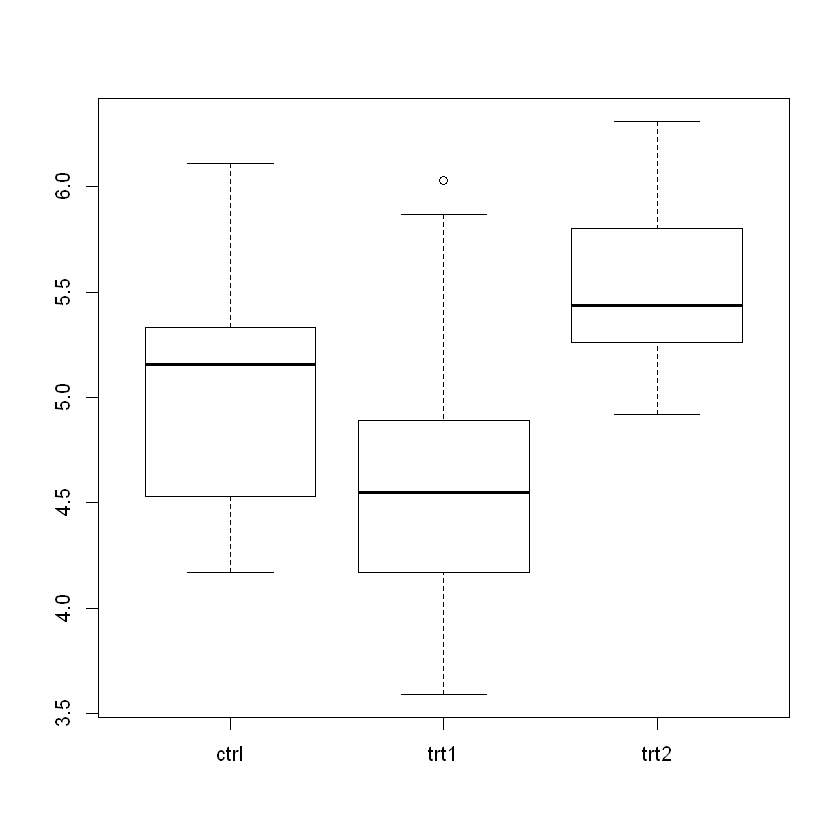

In [38]:
levels(PlantGrowth$group)

by(PlantGrowth$weight, PlantGrowth$group, FUN = mean)

boxplot(weight ~ group, PlantGrowth)

oneway.test(weight ~ group, PlantGrowth)


__8.3 (Differences in iris by species).__ <br> The iris data has 50 observations
of four measurements for each of three species of iris: setosa, versicolor, and
virginica. We are interested in possible differences in the sepal length of iris
among the three species. Perform a preliminary analysis as in Example 8.3.
Write the effects model for a one-way ANOVA. What are the unknown
parameters? Next fit a one-way ANOVA model for Sepal.Length by Species
using lm. Display the ANOVA table. What are the parameter estimates?

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


iris$Species: setosa
[1] 5.006
------------------------------------------------------------ 
iris$Species: versicolor
[1] 5.936
------------------------------------------------------------ 
iris$Species: virginica
[1] 6.588


	One-way analysis of means

data:  iris$Sepal.Length and iris$Species
F = 119.26, num df = 2, denom df = 147, p-value < 2.2e-16


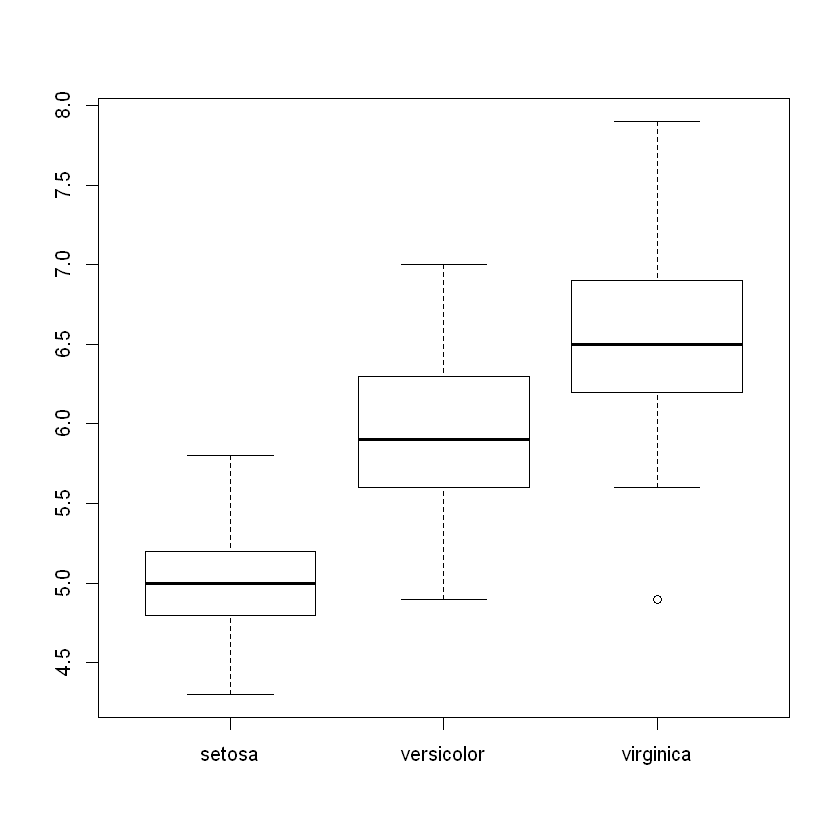

In [58]:
head(iris)
by(iris$Sepal.Length, iris$Species, FUN = mean )

boxplot(iris$Sepal.Length ~ iris$Species)
oneway.test(iris$Sepal.Length ~ iris$Species, var.equal = TRUE)

In [60]:
L = lm(iris$Sepal.Length ~ iris$Species)
L


Call:
lm(formula = iris$Sepal.Length ~ iris$Species)

Coefficients:
           (Intercept)  iris$Speciesversicolor   iris$Speciesvirginica  
                 5.006                   0.930                   1.582  


In [62]:
print(predict(L))

    1     2     3     4     5     6     7     8     9    10    11    12    13 
5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.936 5.936 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 
   79    80    81    82    83    84    85    86    8

In [67]:
M = aov(iris$Sepal.Length ~ iris$Species)
model.tables(M, type = "means")


Tables of means
Grand mean
         
5.843333 

 iris$Species 
iris$Species
    setosa versicolor  virginica 
     5.006      5.936      6.588 

In [69]:
options(show.signif.stars=FALSE)
anova(L)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
iris$Species,2,63.21213,31.6060667,119.2645,1.669669e-31
Residuals,147,38.95620,0.2650082,NA,NA


__8.4 (Checking model assumptions).__ <br> Refer to your results from Exercise
8.3. What are the assumptions required for inference? Analyze the residuals
of the model to assess whether there is a serious departure from any of these
assumptions. How can you check for normality of the error variable?

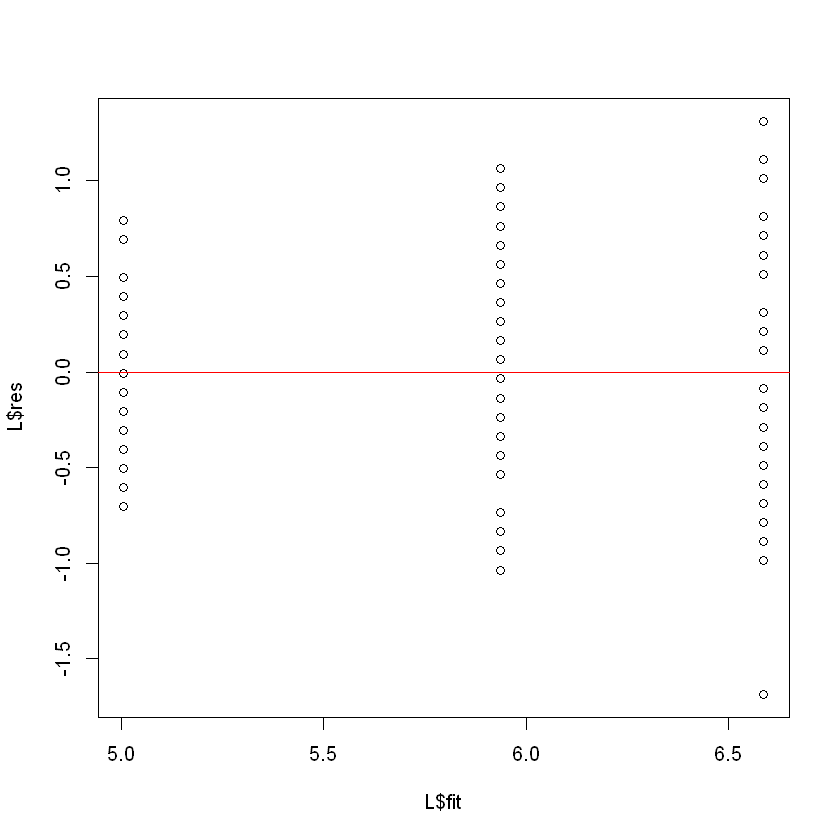

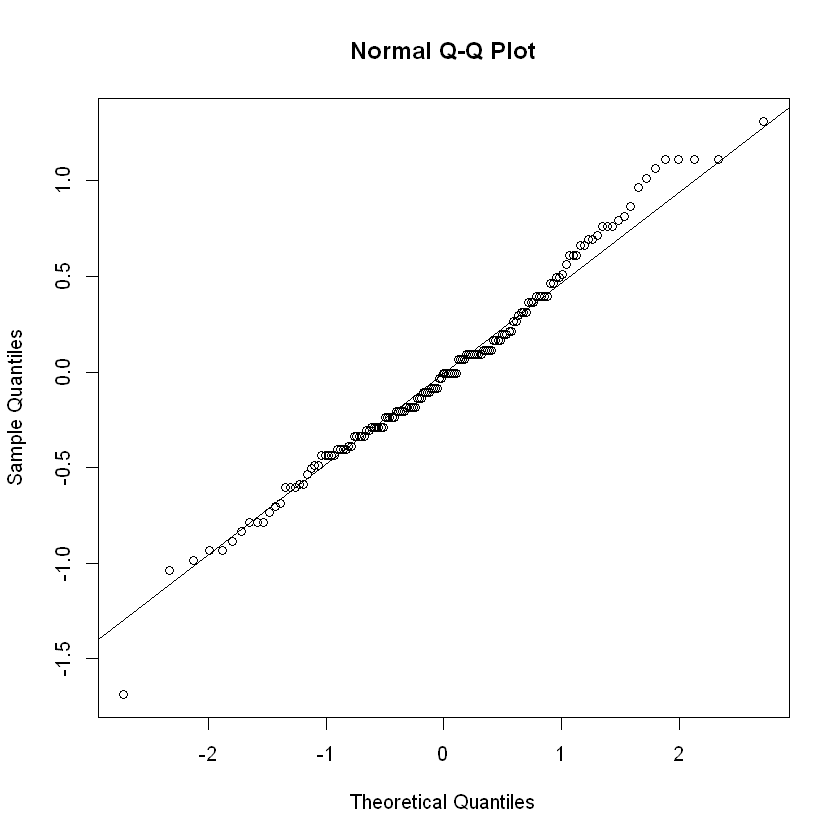

In [70]:
plot(L$fit, L$res)
abline(h = 0, col = "red")
qqnorm(L$res)
qqline(L$res)

__8.5 (Cancer survival data).__ <br> The cancer survival data “PATIENT.DAT”
was introduced in Example 8.9. Start with the exploratory data analysis,
and check for NID error model assumptions. Consider a transformation of
the data if the assumptions for error are not satisfied. Complete a one-way
ANOVA to determine whether mean survival times differ by organ. If there
are significant differences, follow up with appropriate multiple comparisons
to determine which means differ and describe how they differ.

In [9]:
stomach = c(124,42,25,45,412,51,1112,46,103,876,146,340,396,NA,NA,NA,NA)
bronchus = c(81,461,20,450,246,166,63,64,155,859,151,166,37,223,138,72,245)
colon  = c(248,377,189,1843,180,537,519,455,406,365,942,776,372,163,101,20,283)
ovary = c(1234,89,201,356,2970,456,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA)
breast = c(1235,24,1581,1166,40,727,3808,791,1804,3460,719,NA,NA,NA,NA,NA,NA)
table  = data.frame(stomach, bronchus, colon, ovary, breast)
table = stack(table)


values,ind
124,stomach
42,stomach
25,stomach
45,stomach
412,stomach
51,stomach


table$ind: stomach
[1] 286
------------------------------------------------------------ 
table$ind: bronchus
[1] 211.5882
------------------------------------------------------------ 
table$ind: colon
[1] 457.4118
------------------------------------------------------------ 
table$ind: ovary
[1] 884.3333
------------------------------------------------------------ 
table$ind: breast
[1] 1395.909

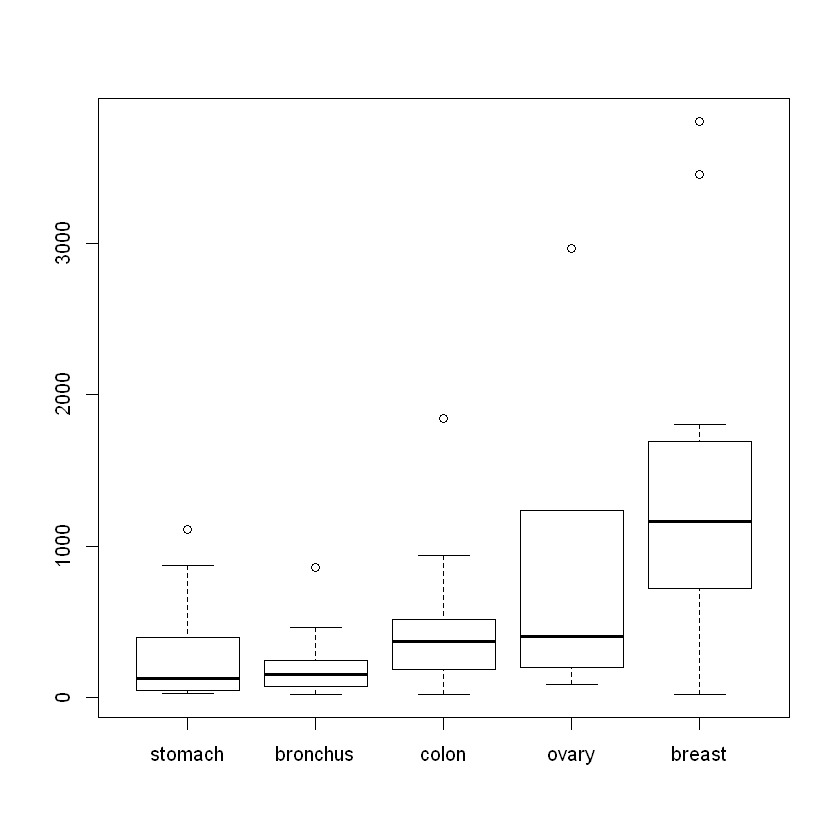

In [14]:
boxplot(values ~ ind, data = table)
by(table$values, table$ind, FUN = mean, na.rm = TRUE )


In [16]:
oneway.test(table$values ~ table$ind, var.equal = TRUE)


	One-way analysis of means

data:  table$values and table$ind
F = 6.4334, num df = 4, denom df = 59, p-value = 0.0002295


In [20]:
L = lm(table$values ~ table$ind)
L


Call:
lm(formula = table$values ~ table$ind)

Coefficients:
      (Intercept)  table$indbronchus     table$indcolon     table$indovary  
           286.00             -74.41             171.41             598.33  
  table$indbreast  
          1109.91  


In [21]:
M = aov(table$values ~ table$ind)
model.tables(M, types = "means")

Tables of effects

 table$ind 
    stomach bronchus  colon ovary breast
     -272.6     -347 -101.2 325.7  837.3
rep    13.0       17   17.0   6.0   11.0

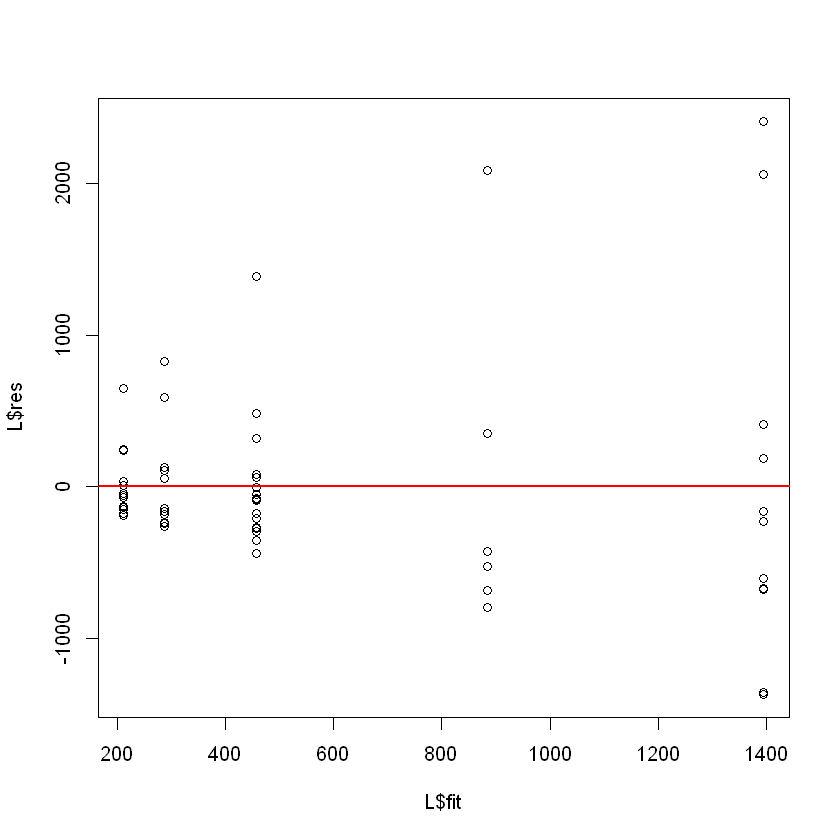

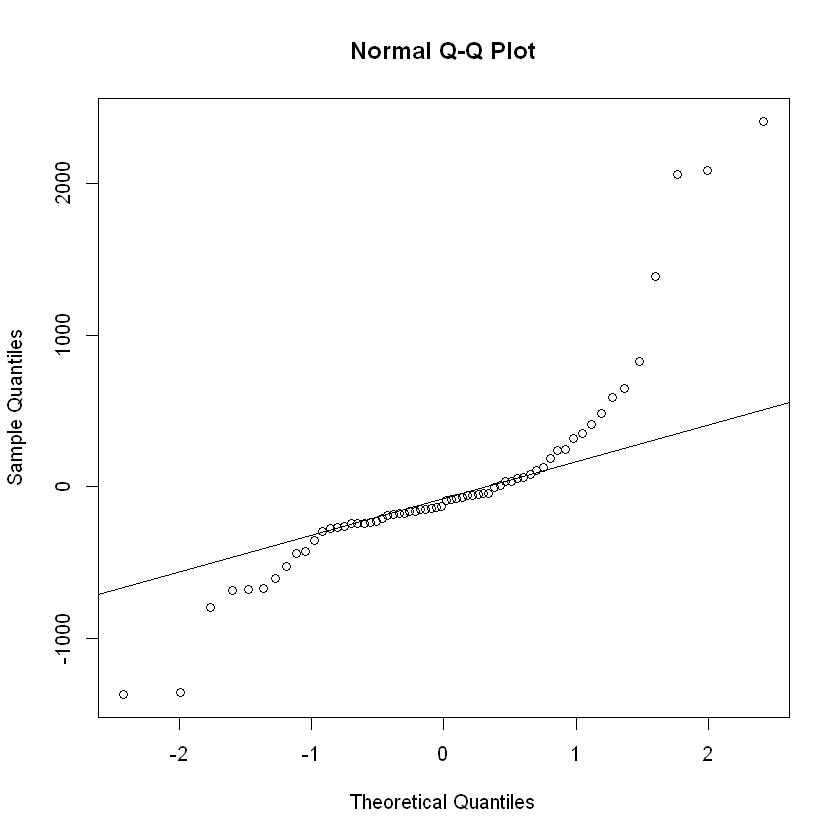

In [23]:
 plot(L$fit, L$res)
abline(h = 0, lwd= 2, col = "red")

qqnorm(L$res)
qqline(L$res)

In [24]:
anova(L)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
table$ind,4,11535761,2883940.1,6.433437,0.0002294532
Residuals,59,26448144,448273.6,NA,NA


In [25]:
M

Call:
   aov(formula = table$values ~ table$ind)

Terms:
                table$ind Residuals
Sum of Squares   11535761  26448144
Deg. of Freedom         4        59

Residual standard error: 669.5324
Estimated effects may be unbalanced
21 observations deleted due to missingness

In [26]:
summary(M)

            Df   Sum Sq Mean Sq F value   Pr(>F)    
table$ind    4 11535761 2883940   6.433 0.000229 ***
Residuals   59 26448144  448274                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
21 observations deleted due to missingness

In [27]:
TukeyHSD(M)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = table$values ~ table$ind)

$`table$ind`
                       diff       lwr       upr     p adj
bronchus-stomach  -74.41176 -768.5540  619.7305 0.9981461
colon-stomach     171.41176 -522.7305  865.5540 0.9568289
ovary-stomach     598.33333 -331.5179 1528.1846 0.3772923
breast-stomach   1109.90909  338.0792 1881.7390 0.0013962
colon-bronchus    245.82353 -400.3877  892.0348 0.8208402
ovary-bronchus    672.74510 -221.8939 1567.3841 0.2271084
breast-bronchus  1184.32086  455.2962 1913.3455 0.0002385
ovary-colon       426.92157 -467.7174 1321.5606 0.6659115
breast-colon      938.49733  209.4727 1667.5220 0.0053072
breast-ovary      511.57576 -444.5973 1467.7488 0.5630900


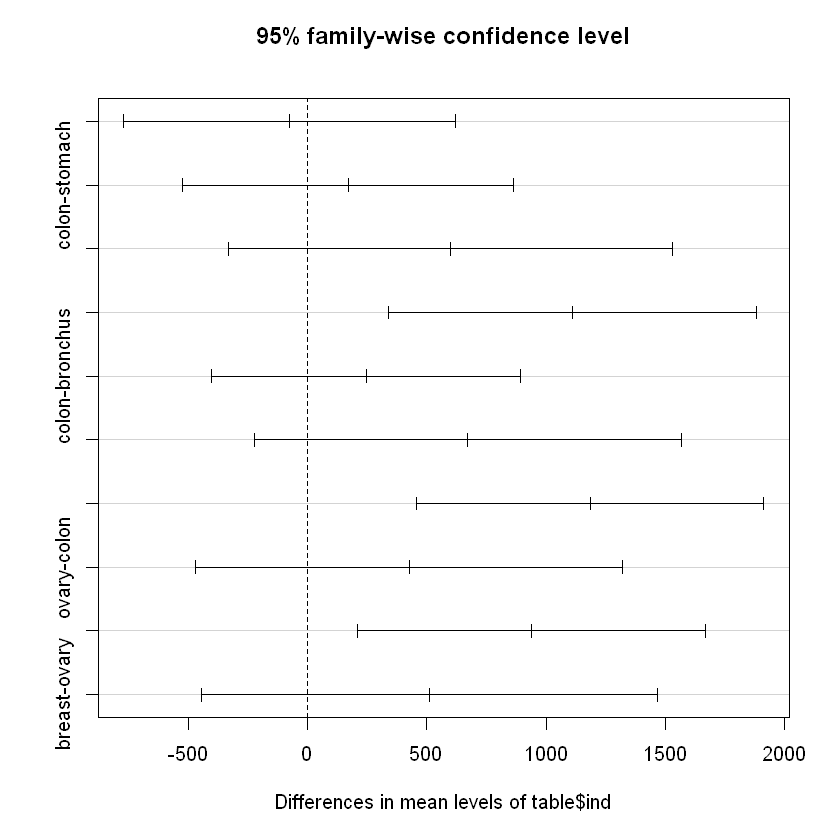

In [28]:
plot(TukeyHSD(M))

__8.6 (Comparing waste at different manufacturing plants).__ <br> The ‘Waste
Run-up’ data ([28, p. 86], [12]) is available at the DASL web site. The data
are weekly percentage waste of cloth by five different supplier plants of LeviStrauss, relative to cutting from a computer pattern. The question here is
whether the five supplier plants differ in waste run-up. The data has been
saved in a text file “wasterunup.txt”. The five columns correspond to the five
different manufacturing plants. The number of values in each column differs
and the empty positions are filled with the symbol \*. Use na.strings="\*"
in read.table to convert these to NA and use stack to reformat the data in
a one-way layout. (Also see Example 10.1.) <br> <br>
Display side-by-side (parallel) boxplots of the data. Are any outliers in the
data? Construct an ANOVA table using lm or aov. Plot residuals vs fits, and
also construct a Normal-QQ plot of residuals using qqnorm and qqline. Do
the residuals appear to satisfy the iid Normal(0,σ2) assumptions required for
valid inference?

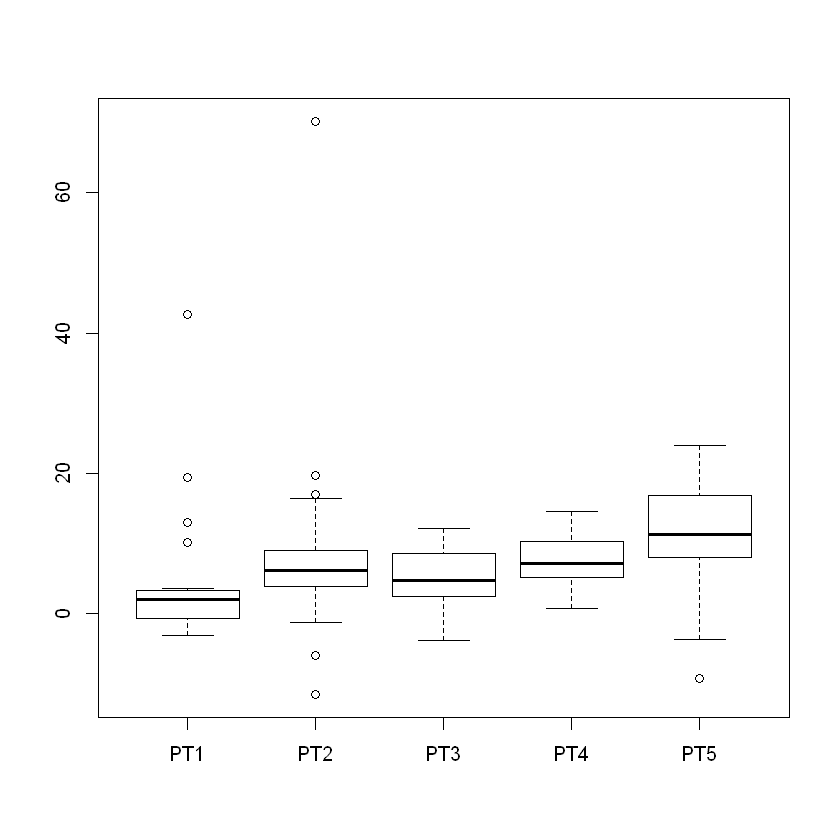

In [44]:
waste = read.table(file = "wasterunup.txt", header = TRUE, na.strings = "*")
waste = stack(waste)
boxplot(waste$values ~ waste$ind)

In [48]:
L = lm(waste$values ~ waste$ind)
aov(L)
summary(aov(L))

Call:
   aov(formula = L)

Terms:
                waste$ind Residuals
Sum of Squares    450.921  8749.088
Deg. of Freedom         4        90

Residual standard error: 9.859619
Estimated effects may be unbalanced
15 observations deleted due to missingness

            Df Sum Sq Mean Sq F value Pr(>F)
waste$ind    4    451  112.73    1.16  0.334
Residuals   90   8749   97.21               
15 observations deleted due to missingness

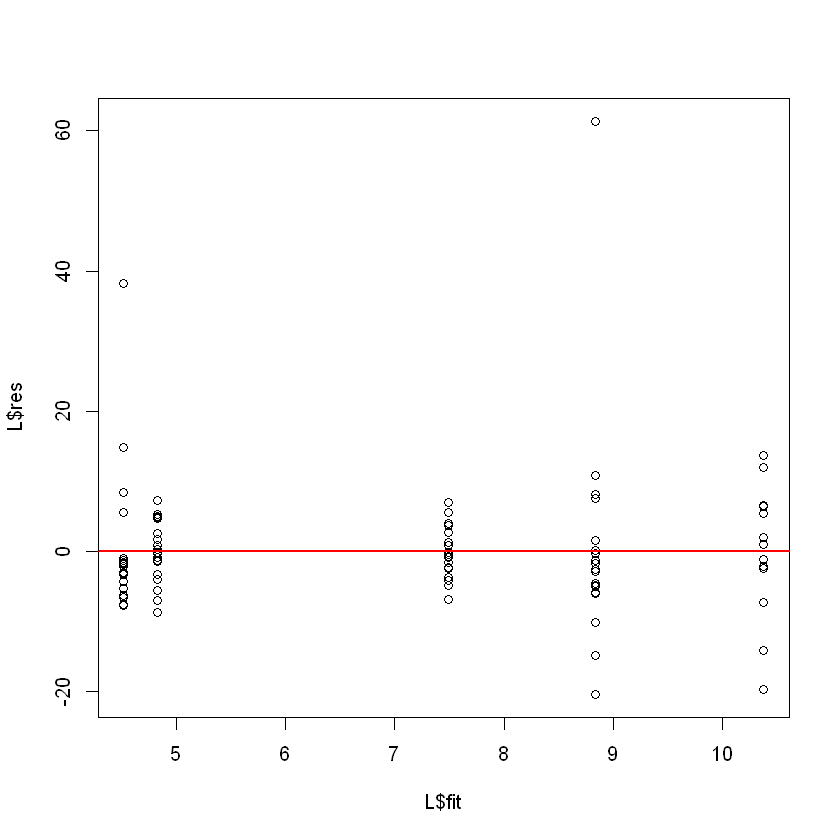

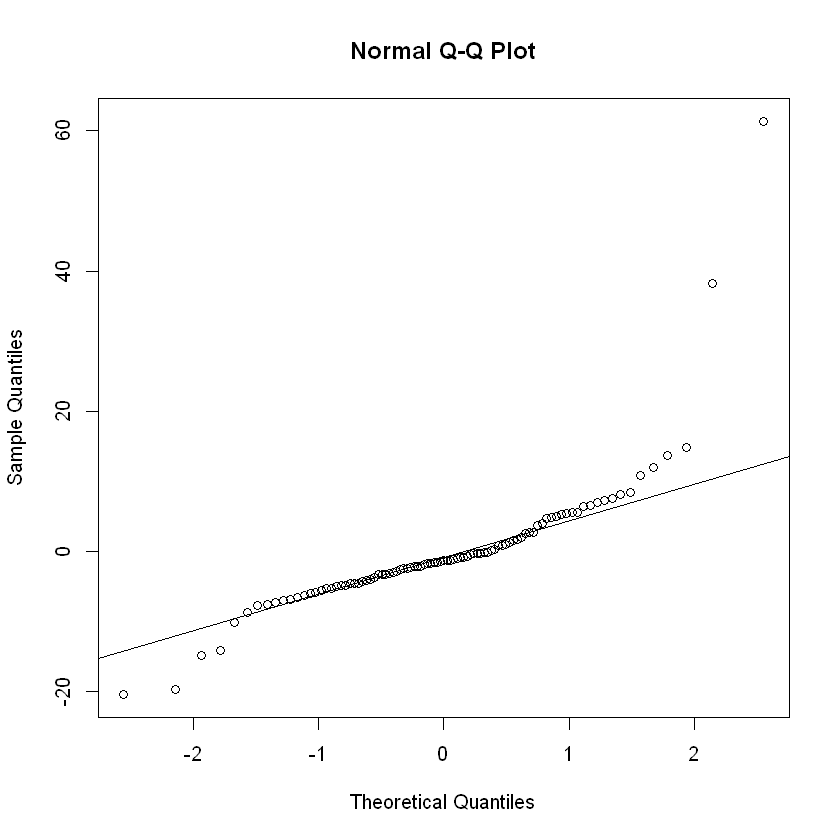

In [49]:
plot(L$fit, L$res)
abline(h=0, lwd = 2, col = "red")
qqnorm(L$res)
qqline(L$res)